# Importando os arquivos e bibliotecas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Conhecendo os dados de treino e teste

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#obtendo informações estatíticas de algumas features numéricas - train
train.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#verificando a existência de dados nulos - train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#obtendo informações estatíticas de algumas features numéricas - test
test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
#verificando a existência de dados nulos - test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#Visualizando as features por gráfico

In [0]:
survivor = train.query('Survived==1').Pclass.value_counts()
dead = train.query('Survived==0').Pclass.value_counts()
df_Pclass = pd.DataFrame([dead,survivor])
df_Pclass= df_Pclass.reset_index()
df_Pclass.drop('index', axis=1, inplace=True)
df_Pclass

,1,2,3
0,80,97,372
1,136,87,119


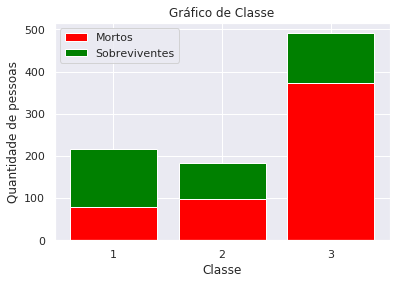

In [108]:
plt.bar(df_Pclass.columns, df_Pclass.iloc[0], color='red')
plt.bar(df_Pclass.columns, df_Pclass.iloc[1], color='green', bottom=df_Pclass.iloc[0])
plt.xlabel('Classe')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de Classe')
plt.legend(('Mortos', 'Sobreviventes'))
xpos= np.arange(len(df_Pclass.iloc[1]))
plt.xticks(xpos+0.5+0.5, ('1','2','3'))
plt.show()

In [99]:
#Sexo
survivor = train.query('Survived==1').Sex.value_counts()
dead = train.query('Survived==0').Sex.value_counts()
df_Sex = pd.DataFrame([dead,survivor])
df_Sex= df_Sex.reset_index()
df_Sex.drop('index', axis=1, inplace=True)
df_Sex

,male,female
0,468,81
1,109,233


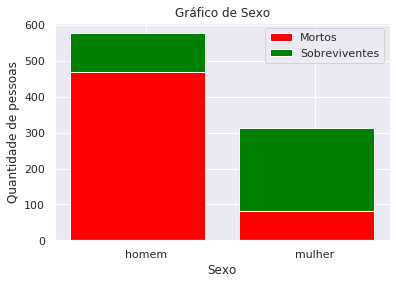

In [106]:
plt.bar(df_Sex.columns, df_Sex.iloc[0], color='red')
plt.bar(df_Sex.columns, df_Sex.iloc[1], color='green', bottom=df_Sex.iloc[0])
plt.xlabel('Sexo')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de Sexo')
plt.legend(('Mortos', 'Sobreviventes'))
xpos= np.arange(len(df_Sex.iloc[1]))
plt.xticks(xpos+0.05, ('homem','mulher'))
plt.show()

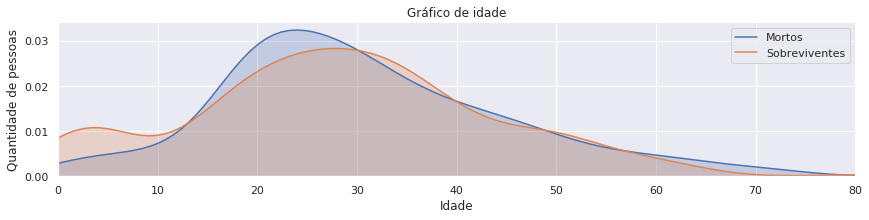

In [115]:
#Idade
ax = sns.FacetGrid(train, hue="Survived",aspect=4)
ax.map(sns.kdeplot,'Age',shade= True)
ax.set(xlim=(0, train['Age'].max()))
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de idade')
plt.legend(('Mortos', 'Sobreviventes'))
 
plt.show()

In [116]:
#SibSp - of siblings / spouses aboard the Titanic
survivor = train.query('Survived==1').SibSp.value_counts()
dead = train.query('Survived==0').SibSp.value_counts()
df_SibSp = pd.DataFrame([dead,survivor])
df_SibSp = df_SibSp.reset_index()
df_SibSp.drop('index', axis=1, inplace=True)
df_SibSp

,0,1,2,3,4,5,8
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


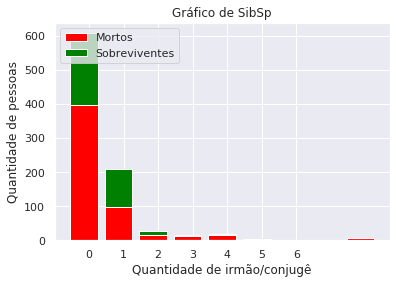

In [128]:
plt.bar(df_SibSp.columns, df_SibSp.iloc[0], color='red')
plt.bar(df_SibSp.columns, df_SibSp.iloc[1], color='green', bottom=df_SibSp.iloc[0])
plt.xlabel('Quantidade de irmão/conjugê')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de SibSp')
plt.legend(('Mortos', 'Sobreviventes'))
xpos= np.arange(len(df_SibSp.iloc[0]))
plt.xticks(xpos+0.05+0.05+0.05, ('0','1','2','3','4','5', '6', '7', '8'))
plt.show()

In [129]:
#Parch - of parents / children aboard the Titanic
survivor = train.query('Survived==1').Parch.value_counts()
dead = train.query('Survived==0').Parch.value_counts()
df_Parch = pd.DataFrame([dead,survivor])
df_Parch = df_Parch.reset_index()
df_Parch.drop('index', axis=1, inplace=True)
df_Parch

,0,1,2,3,4,5,6
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


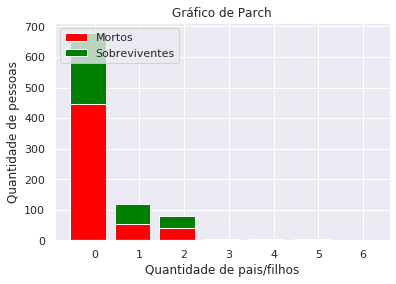

In [133]:
plt.bar(df_Parch.columns, df_Parch.iloc[0], color='red')
plt.bar(df_Parch.columns, df_Parch.iloc[1], color='green', bottom=df_Parch.iloc[0])
plt.xlabel('Quantidade de pais/filhos')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de Parch')
plt.legend(('Mortos', 'Sobreviventes'))
xpos= np.arange(len(df_Parch.iloc[0]))
plt.xticks(xpos+0.05+0.05+0.05, ('0','1','2','3','4','5', '6'))
plt.show()

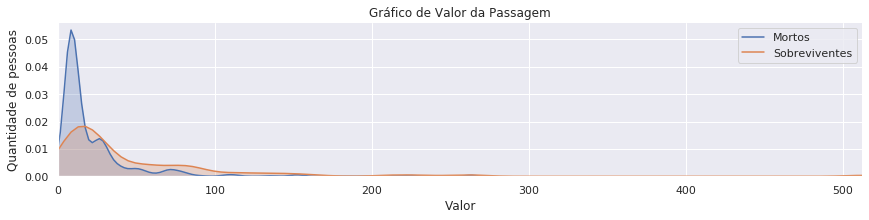

In [134]:
#Valor da passagem
ax = sns.FacetGrid(train, hue="Survived",aspect=4)
ax.map(sns.kdeplot,'Fare',shade= True)
ax.set(xlim=(0, train['Fare'].max()))
plt.xlabel('Valor')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de Valor da Passagem')
plt.legend(('Mortos', 'Sobreviventes'))
 
plt.show()

In [135]:
#Embarked - Port of Embarkation
survivor = train.query('Survived==1').Embarked.value_counts()
dead = train.query('Survived==0').Embarked.value_counts()
df_Embarked = pd.DataFrame([dead,survivor])
df_Embarked = df_Embarked.reset_index()
df_Embarked.drop('index', axis=1, inplace=True)
df_Embarked

,S,C,Q
0,427,75,47
1,217,93,30


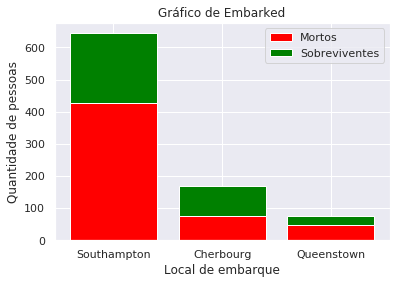

In [141]:
plt.bar(df_Embarked.columns, df_Embarked.iloc[0], color='red')
plt.bar(df_Embarked.columns, df_Embarked.iloc[1], color='green', bottom=df_Embarked.iloc[0])
plt.xlabel('Local de embarque')
plt.ylabel('Quantidade de pessoas')
plt.title('Gráfico de Embarked')
plt.legend(('Mortos', 'Sobreviventes'))
xpos= np.arange(len(df_Embarked.iloc[0]))
plt.xticks(xpos, ('Southampton', 'Cherbourg', 'Queenstown'))
plt.show()